# Assignment 24 may Activation Function

In [ ]:
# Ans 1: An Activation Function decides whether a neuron should be activated or not. This means that it will decide whether the neuron's input to the network is important or not in the process of prediction using simpler mathematical operations

In [ ]:
# Ans 2: Sigmoid / Logistic Activation Function.
#Tanh Function (Hyperbolic Tangent) 
#ReLU Function.
#Leaky ReLU Function.
#Parametric ReLU Function.
#Exponential Linear Units (ELUs) Function.
#Softmax Function
#Swish

In [ ]:
# Ans 3: Activation functions are a critical part of the design of a neural network. The choice of activation function in the hidden layer will control how well the network model learns the training dataset. The choice of activation function in the output layer will define the type of predictions the model can make

In [ ]:
# Ans 4: This function takes any real value as input and outputs values in the range of 0 to 1. The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to 0.0, as shown below
# Advantage : The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice
# Disadvantage : It is most prone to gradient vanishing problem. Function output is not zero-centred. Power operations are relatively time-consuming which increases model complexity.

In [ ]:
# Ans 5 : A rectified linear unit (ReLU) is an activation function that introduces the property of non-linearity to a deep learning model and solves the vanishing gradients issue. "It interprets the positive part of its argument. It is one of the most popular activation functions in deep learning
# The forward and backward passes through ReLU are both just a simple "if" statement. Sigmoid activation, in comparison, requires computing an exponent. This advantage is huge when dealing with big networks with many neurons, and can significantly reduce both training and evaluation times.

In [ ]:
# Ans 6 : It doesn't allow for the activation of all of the neurons at the same time. i.e., if any input is negative, ReLU converts it to zero and doesn't allow the neuron to get activated. This means that only a few neurons are activated, making the network easy for computation
# Efficiency: ReLu is faster to compute than the sigmoid function, and its derivative is faster to compute. This makes a significant difference to training and inference time for neural networks: only a constant factor, but constants can matter. Simplicity: ReLu is simple

In [ ]:
# Ans 7 : Leaky Rectified Linear Unit, or Leaky ReLU, is a type of activation function based on a ReLU, but it has a small slope for negative values instead of a flat slope. The slope coefficient is determined before training, i.e. it is not learnt during training
# This is true regardless of the number of layers. LeakyReLU on the other hand, maps the values less than zeros to a very small positive number. This prevents vanishing gradient from occurring

In [ ]:
# Ans 8 : The softmax function is often used as the last activation function of a neural network to normalize the output of a network to a probability distribution over predicted output classes, based on Luce's choice axiom.
# The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution. That is, softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels

In [ ]:
# Ans 9: The hyperbolic tangent activation function is also referred to simply as the Tanh (also “tanh” and “TanH“) function. It is very similar to the sigmoid activation function and even has the same S-shape. The function takes any real value as input and outputs values in the range -1 to 1
#We observe that the gradient of tanh is four times greater than the gradient of the sigmoid function. This means that using the tanh activation function results in higher values of gradient during training and higher updates in the weights of the network

# Assignment 24 may Batch Normalization

In [1]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 85.0 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 62.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 83.9 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [2]:
import tensorflow as tf
import numpy as np
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import os

2023-06-14 07:11:46.709091: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-14 07:11:47.262900: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-14 07:11:47.264902: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 07:11:49.058976: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
print(f"Tensorflow version{tf.__version__}")
print(f"keras version {tf.keras.__version__}")

Tensorflow version2.12.0
keras version 2.12.0


In [5]:
os.getcwd()

'/home/jovyan/work/Assignment'

# Creating a simple Classifier usuing keras on MNIST data

In [7]:
cifar_10=tf.keras.datasets.cifar10

In [8]:
cifar_10

<module 'keras.api._v2.keras.datasets.cifar10' from '/opt/conda/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/cifar10/__init__.py'>

In [9]:
(X_train_full,y_train_full),(X_test,y_test)=cifar_10.load_data()

In [10]:
X_train_full[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
print(X_train_full.shape)
print(X_test.shape)
print(y_train_full.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [12]:
X_train_full[0].shape

(32, 32, 3)

In [13]:
x_valid,X_train=X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

X_test=X_test/255

In [14]:
x_valid[:1]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [15]:
len(X_train_full[5000:])

45000

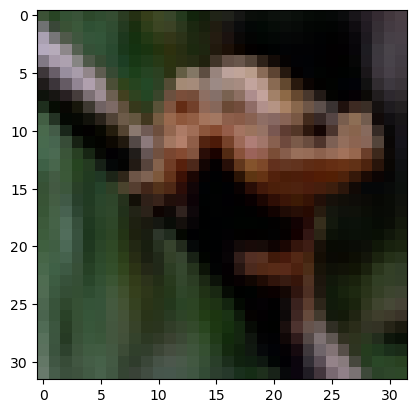

In [16]:
plt.imshow(X_train[0],cmap='binary')
plt.show(block=True)

In [17]:
Layers=[tf.keras.layers.Flatten(input_shape=[28,28,3],name='inputLayer'),
        tf.keras.layers.Dense(300,activation='relu',name='hiddenLayer1',use_bias=True),
        tf.keras.layers.Dense(100,activation='relu',name='hiddenlayer2'),
        tf.keras.layers.Dense(10,activation='softmax',name='outputlayer')
       ]
model_clf=tf.keras.models.Sequential(Layers)

In [18]:
model_clf.layers

In [19]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 2352)              0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               705900    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 737,010
Trainable params: 737,010
Non-trainable params: 0
_________________________________________________________________


In [20]:
hidden1=model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [21]:
hidden1.get_weights()[0].shape

(2352, 300)

In [22]:
hidden1.get_weights()[1].shape

(300,)

In [23]:
weights,biases=hidden1.get_weights()

In [24]:
weights.shape,biases.shape

((2352, 300), (300,))

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
weights

array([[-0.03180774, -0.02292885, -0.02337381, ..., -0.0026267 ,
         0.03871196,  0.02076357],
       [ 0.0089219 ,  0.0446373 ,  0.0242648 , ..., -0.01011208,
         0.00997401, -0.03048143],
       [ 0.02472123, -0.00476823, -0.03168602, ..., -0.00236475,
        -0.02625742, -0.0310983 ],
       ...,
       [-0.02990985, -0.00803861, -0.03010988, ...,  0.0185901 ,
         0.00585806,  0.01475517],
       [-0.00865002,  0.01154729, -0.0215336 , ..., -0.02409237,
         0.02576596,  0.04092153],
       [ 0.02513002,  0.03222095, -0.01222133, ..., -0.04438449,
        -0.02175069, -0.01426232]], dtype=float32)

In [27]:
LOSS_FUNCTION='Kullback Leibler Divergence Loss'
OPTIMIZER='SGD'
METRICES=['accuracy']
model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICES
                 )

In [28]:
EPOCHS=10
VALIDATION_SET=(x_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/10


ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 28, 28, 3), found shape=(None, 32, 32, 3)


In [29]:
# Ans 1: Batch Norm is a normalization technique done between the layers of a Neural Network instead of in the raw data. It is done along mini-batches instead of the full data set. It serves to speed up training and use higher learning rates, making learning easier.

In [30]:
# Ans 2: Using batch normalization allows us to use much higher learning rates, which further increases the speed at which networks train. Makes weights easier to initialize — Weight initialization can be difficult, and it's even more difficult when creating deeper networks

In [31]:
# Ans 3: Batch Norm is a normalization technique done between the layers of a Neural Network instead of in the raw data. It is done along mini-batches instead of the full data set. It serves to speed up training and use higher learning rates, making learning easier.

In [ ]:
# Ans 3.2: Using batch normalization allows us to use much higher learning rates, which further increases the speed at which networks train. Makes weights easier to initialize — Weight initialization can be difficult, and it's even more difficult when creating deeper networks